## Making a static map of tephra fall on buildings

Plot data from two different files with an open access basemap. 

In [51]:
# Import required libraries 

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [104]:
# Read in the shapefiles
fp = 'data/Rabaul_georef.shp'
fp2 = 'data/Tavurvur_iso.shp'

tephra = gpd.read_file(fp2)
data = gpd.read_file(fp)
tephra.head(1)

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,cm_name,geometry
0,50 mm,Tephra thickness of 50 mm,None,None,None,None,1,0,-1,None,None,5.0,"POLYGON ((152.17429 -4.13971, 152.17677 -4.140..."


<AxesSubplot:>

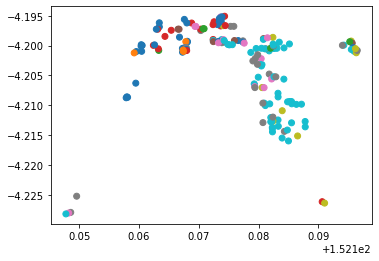

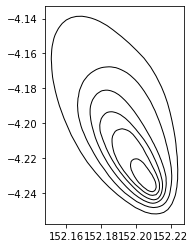

In [93]:
%matplotlib inline

# Check how the data look
data.plot('Rab_DI')
tephra.plot(facecolor = 'None', ec = 'k', linewidth=1)

In [95]:
# Add a basemap using contextily
# Reproject data to web mercator (EPSG 3857)
tephra= tephra.to_crs(epsg=3857)
data = data.to_crs(epsg=3857)
data.crs

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


{'init': 'epsg:3857', 'no_defs': True}

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  # Remove the CWD from sys.path while we load stuff.


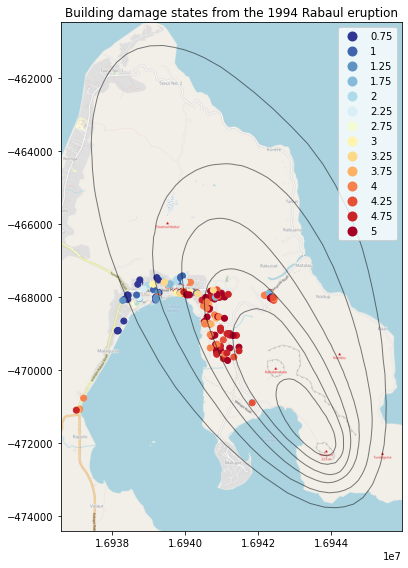

In [103]:
# Create axes to plot figure into
fig, ax = plt.subplots(figsize=(10,8))

# Plot the data
data.plot(ax=ax, column = 'Rab_DI', cmap = 'RdYlBu_r', legend=True)
tephra.plot(ax=ax,facecolor = 'None', ec = 'k', linewidth=1, alpha = 0.5)

# Add a basemap using contextily

ctx.add_basemap(ax=ax, source=ctx.tile_providers.OSM_B)

ax.set_title('Building damage states from the 1994 Rabaul eruption')
# Use a tight layout to remove whitespace
plt.tight_layout()

# Save the figure
plt.savefig('docs/Rabaul_94.png')